In [49]:
import json, geojson
import geopandas as gpd
from shapely import geometry
import matplotlib.pyplot as plt

In [16]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).set_index('name')

In [31]:
world[world.iso_a3=='-99']

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Norway,5320045,Europe,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
France,67106161,Europe,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
N. Cyprus,265100,Asia,-99,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
Somaliland,3500000,Africa,-99,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [5]:
coal_regions = [[21.514434835159015, 41.05289799991099],
         [21.539840718948078, 40.96273879800708],
         [21.59691170108442, 40.85882490951949],
         [21.644290241123482, 40.62054413309581],
         [-51.31701961671447, -29.96287852893486],
         [-72.30641376277983, -52.95990385886694],
         [96.2968700579145, 4.314672791448272],
         [105.4704540422895, -3.6877278548262638],
         [103.9543407610395, -3.3148906008489103],
         [103.0974071672895, -1.9320978410391163],
         [101.6032665422895, -0.4163471765523946],
         [102.5700634172895, 0.3746621141739759],
         [101.0539501360395, 0.8140905160280408],
         [102.9435985735395, -3.8192809646916053],
         [101.5812938860395, -2.6346601407328967],
         [98.3513134172895, 2.4174042779022926],
         [117.3576610735395, 4.150327359585998],
         [117.3356884172895, 2.8344454434295066],
         [117.6213329485395, 2.4832619714268978],
         [117.5334423235395, 0.7481786768655979],
         [117.3137157610395, -0.5042349567792487],
         [116.1931102922895, -1.1194046200300427],
         [115.4680126360395, -3.5342246664409926],
         [115.4460399797895, -1.82229353663934],
         [115.3361766985395, -0.5262067245300543],
         [116.0832470110395, 0.5064941249449211],
         [111.9304149797895, 0.9459108749549853],
         [112.6335399797895, 0.19888313488224615],
         [133.7782631369208, -1.7139717311588334],
         [81.9114740025521, 43.56690773849482],
         [83.8450677525521, 43.08739288556442],
         [80.5931146275521, 41.49463918701909],
         [87.3167474400521, 44.48322906157229],
         [87.8001458775521, 43.7259046077949],
         [86.6136224400521, 42.894527363684205],
         [90.0853021275521, 44.48322906157229],
         [89.8216302525521, 43.27965306001476],
         [93.0735833775521, 43.11947829330471],
         [101.10097292656508, 38.816055253162766],
         [103.29823855156508, 37.433313345167186],
         [104.66054323906508, 36.30836561603278],
         [103.82558230156508, 36.060081139502266],
         [108.03868768497637, 28.5342187373546],
         [106.45665643497637, 27.408708366627327],
         [106.72032830997637, 26.54712927852514],
         [105.05040643497637, 27.213475214537382],
         [105.05040643497637, 26.66500465804764],
         [116.75974433759637, 36.07766794908595],
         [116.75974433759637, 35.32827418281214],
         [116.58396308759637, 34.499466367206864],
         [116.58396308759637, 33.62575199692753],
         [116.14450996259637, 32.446895687915],
         [116.71579902509637, 32.372695240649385],
         [114.47458808759637, 35.86427468066604],
         [114.03513496259637, 35.39994814183908],
         [113.37595527509637, 34.39074545743589],
         [115.70505683759637, 39.91999022915576],
         [118.51755683759637, 39.886278460089706],
         [118.82517402509637, 41.97759856817368],
         [122.29685371259637, 43.68548654875893],
         [119.66013496259637, 45.46950693675829],
         [114.73825996259637, 44.28624238069318],
         [112.84861152509637, 43.20691252745799],
         [109.24509590009637, 38.764508182141256],
         [109.59665840009637, 39.344637052860094],
         [110.21189277509637, 39.9536854096777],
         [110.38767402509637, 39.51435517794878],
         [110.82712715009637, 39.91999022915576],
         [109.90427558759637, 39.75126556895028],
         [109.99216621259637, 39.10633771995654],
         [110.38767402509637, 39.17450579157702],
         [113.15622871259637, 40.15550793994168],
         [113.02439277509637, 39.75126556895028],
         [112.62888496259637, 39.37861374443282],
         [112.49704902509637, 35.39994814183908],
         [111.70603340009637, 35.899880271290336],
         [113.06833808759637, 36.71437726620605],
         [111.96970527509637, 37.20597928709451],
         [113.33200996259637, 38.558620339892244],
         [112.40915840009637, 38.14507136497368],
         [112.23337715009637, 38.96980364059232],
         [110.78318183759637, 35.86427468066604],
         [110.91501777509637, 36.67914150078304],
         [106.43259590009637, 35.36411911654811],
         [106.65232246259637, 34.89689668518347],
         [106.65232246259637, 34.28188315504809],
         [107.66306465009637, 34.39074545743589],
         [108.45408027509637, 35.39994814183908],
         [109.02536933759637, 36.32589675676796],
         [109.81638496259637, 36.04214247185518],
         [109.02536933759637, 34.96895142871487],
         [129.30625982463675, 44.53749527882643],
         [75.08428114287705, 34.29681414054128],
         [75.34795301787705, 32.832167179884806],
         [72.35967176787705, 27.905716728247615],
         [69.72295301787705, 23.31059669501246],
         [79.41289442412705, 12.520908525778284],
         [82.07905379794164, 16.715561386750853],
         [81.68354598544164, 17.42970531886352],
         [80.98042098544164, 18.558172856903187],
         [80.67280379794164, 21.448380954365643],
         [79.44233504794164, 21.856824304538772],
         [80.49702254794164, 19.88598686916588],
         [80.76069442294164, 22.467300322851884],
         [82.07905379794164, 22.54849602603231],
         [84.05659286044164, 22.589075980715474],
         [85.77046004794164, 22.589075980715474],
         [86.60542098544164, 22.264103056869505],
         [87.96772567294164, 22.019876526792675],
         [88.14350692294164, 25.16061477573774],
         [87.57221786044164, 24.72230002883196],
         [85.19917098544164, 24.802109450881236],
         [83.79292098544164, 25.24014033508795],
         [85.72651473544164, 24.60248990110915],
         [86.78120223544164, 24.802109450881236],
         [83.00190536044164, 25.319613893049247],
         [95.74604598544164, 27.36729454356877],
         [94.33979598544164, 26.58402315629205],
         [91.26362411044164, 25.557721372975816],
         [93.46088973544164, 26.111463497038653],
         [114.96930709943285, -29.1881675231704],
         [121.12165084943285, -32.98796301527096],
         [145.90680709943285, -38.40843521923213],
         [146.52204147443285, -38.44286264897723],
         [139.84235397443285, -36.348344837269885],
         [150.91657272443285, -34.23227238813091],
         [150.34528366193285, -34.558628110799965],
         [150.60895553693285, -34.63097859761028],
         [151.53180709943285, -33.172073758579494],
         [151.00446334943285, -32.470409245300985],
         [150.91657272443285, -31.576227228085653],
         [150.69684616193285, -32.61858817592786],
         [150.34528366193285, -30.93760046286566],
         [149.99372116193285, -32.396228144369594],
         [149.51032272443285, -32.24768304196287],
         [150.12555709943285, -32.396228144369594],
         [149.86188522443285, -30.37053764805231],
         [150.16950241193285, -30.862184526666827],
         [147.59870163068285, -20.353492550516815],
         [147.95026413068285, -21.29818454381804],
         [148.16999069318285, -22.033311006319536],
         [148.69733444318285, -23.128849612653315],
         [148.78522506818285, -24.055098821266483],
         [149.57624069318285, -24.934869398026816],
         [151.68561569318285, -27.380164062391277],
         [150.80670944318285, -26.989254822684156],
         [149.62018600568285, -26.08501345667949],
         [147.11530319318285, -22.60245580600214],
         [147.11530319318285, -23.572654093265104],
         [147.07135788068285, -24.375726683386237],
         [149.70807663068285, -22.683571940246555],
         [150.58698288068285, -23.693433142289024],
         [152.60846725568285, -25.531147334152724],
         [144.87409225568285, -15.35676208538734],
         [124.13190475568285, -17.966710404034913],
         [89.77445763692197, 49.01399840431928],
         [105.72660607442197, 43.871656053870325],
         [109.46195763692197, 45.496233345924594],
         [106.91312951192197, 47.67046710108777],
         [105.99027794942197, 49.6725096482095],
         [113.63676232442197, 48.02436938776724],
         [106.81859280260488, 20.984655641575703],
         [106.51097561510488, 21.18966789180384],
         [106.58787991197988, 21.138441365730674],
         [105.73094631822988, 21.312539072059383],
         [106.82957913072988, 21.864181426056682],
         [107.23607327135488, 21.18966789180384],
         [106.01659084947988, 21.802991890703908],
         [100.14989163072988, 19.32423898553989],
         [99.60057522447988, 18.638574170025795],
         [121.60902349328364, 18.202885913485936],
         [121.80677739953364, 17.135162797139742],
         [120.09291021203364, 16.04015372242996],
         [119.87318364953364, 15.828870046923607],
         [120.64222661828364, 15.320892086090687],
         [120.75208989953364, 14.981550692715935],
         [120.37855474328364, 14.684184707698513],
         [120.92787114953364, 13.896359202468773],
         [121.56507818078364, 14.428976962349173],
         [121.63099614953364, 14.17347640115554],
         [123.43275396203364, 13.618910005057828],
         [123.60853521203364, 13.27698735293045],
         [123.66346685265864, 12.623871374861668],
         [121.37831060265864, 12.087280120912913],
         [121.21351568078364, 12.344981267447636],
         [122.78456060265864, 11.581900301900477],
         [123.04823247765864, 11.258836521012135],
         [122.64173833703364, 10.859892267378257],
         [123.45472661828364, 10.870681644650274],
         [123.46571294640864, 10.611629754096342],
         [123.69642583703364, 10.492823929442007],
         [123.93812505578364, 10.33074252486058],
         [123.68543950890864, 10.168577498632517],
         [123.56458989953364, 10.21182961103596],
         [124.01502935265864, 10.77356324763937],
         [124.37757818078364, 11.431183010211678],
         [122.08443288027468, 6.96455268569835],
         [123.30391530214968, 7.596618887647428],
         [122.93038014589968, 8.129885271977214],
         [125.05074147402468, 5.960246010144663],
         [125.60005788027468, 7.160805983384814],
         [125.51216725527468, 7.0844951629903035],
         [126.52290944277468, 7.607508654454267],
         [126.29219655214968, 7.672841436734768],
         [126.29219655214968, 8.390821432688284],
         [126.16036061464968, 9.053233558586475],
         [125.68794850527468, 9.55195655291362],
         [124.79805592714968, 8.77103789169524],
         [124.54537038027468, 8.510358950514627],
         [124.05098561464968, 8.15163651333441],
         [70.03025257778688, 25.65216297319577],
         [69.43699085903688, 24.657740795151735],
         [68.05546009731813, 26.07478354360266],
         [68.33561146450563, 25.585295617280508],
         [69.75834095669313, 29.72454293686946],
         [69.11564076138063, 29.810372823300217],
         [68.46744740200563, 29.824670652016223],
         [67.76432240200563, 29.919937216975512],
         [73.09881187284856, 32.75337558487491],
         [72.43963218534856, 32.53598108183783],
         [-110.82735834148855, 28.969065510509047],
         [-110.70788202312917, 28.903564872748433],
         [-110.52523431805105, 29.0837419219464],
         [-101.25472067404348, 27.861030182330257],
         [-92.29358303865547, 15.384845959101183],
         [-96.89685452303047, 19.295596674219528],
         [-97.41321194490547, 17.209023577655767],
         [-3.4143749727438717, 51.47258029051993],
         [-2.8980175508688717, 52.734386194620676],
         [-1.3159863008688717, 52.8406937609767],
         [-1.3489452852438717, 53.39455564793877],
         [-1.3049999727438717, 54.6910655386465],
         [-3.2605663789938717, 56.131553203898335],
         [-3.1397167696188717, 55.92282258901946],
         [-4.084540988368872, 55.77480307498753],
         [-4.469062472743872, 55.514410406672376],
         [7.719585691864381, 52.33113615424819],
         [6.840679441864381, 51.78397721116246],
         [6.566021238739381, 51.62738788079695],
         [7.305918487924032, 49.21090945304885],
         [14.402717253203605, 51.74856175623394],
         [14.545539518828605, 51.39348280704014],
         [14.512580534453605, 50.79319378634047],
         [13.710578581328605, 50.59833772638617],
         [13.556769987578605, 50.84871831283677],
         [12.589973112578605, 50.52156555973927],
         [12.194465300078605, 51.33860895218538],
         [12.589973112578605, 51.36605409882501],
         [12.820686003203605, 50.360637647579324],
         [23.135955119237053, 51.3640730815877],
         [18.679544956964378, 52.654491496869134],
         [19.360697300714378, 52.0370473807328],
         [18.569681675714378, 50.18895982648791],
         [18.921244175714378, 50.42752005605388],
         [17.097513706964378, 48.89155339020695],
         [18.767435581964378, 48.775846016385636],
         [18.789408238214378, 48.39795024421638],
         [20.832865269464378, 47.88477767837754],
         [20.239603550714378, 47.648474821628405],
         [14.805295006945414, 46.36588625147062],
         [23.046812939954805, 45.03942007222846],
         [22.783141064954805, 44.89951254915224],
         [22.827086377454805, 44.587385138278194],
         [23.024840283704805, 42.98833263108186],
         [22.827086377454805, 42.762901147305335],
         [23.134703564954805, 42.488056177190614],
         [22.871031689954805, 42.19572182836215],
         [23.310484814954805, 42.42321046087411],
         [25.969176221204805, 41.9837464963955],
         [27.287535596204805, 42.488056177190614],
         [22.058043408704805, 37.381368452600135],
         [8.474313447798465, 39.30990022507784],
         [27.34447667783445, 41.20122679990659],
         [31.74999425595945, 41.28383581179216],
         [29.31102941220945, 40.294026501413484],
         [26.99291417783445, 39.90746334166076],
         [27.67406652158445, 39.17887837984179],
         [28.11351964658445, 37.38832392711032],
         [30.59642980283445, 37.266017533772164],
         [33.37597081845945, 37.50171578699703],
         [34.65038488095945, 37.73667234055218],
         [36.05663488095945, 37.85820913235736],
         [29.56371495908445, 39.58097552918873],
         [32.01366613095945, 40.347221738743684],
         [31.36547277158445, 40.1711582503529],
         [33.37597081845945, 40.422537222371524],
         [36.83666417783445, 37.91890251747428],
         [36.92455480283445, 39.27547792729708],
         [41.05664411519189, 39.19037992188846],
         [24.044665122606887, 50.22980770881995],
         [37.99730184135689, 49.43615750006229],
         [36.37132527885689, 49.063243160779656],
         [39.55736043510689, 48.99120578617944],
         [38.08519246635689, 49.13517626300949],
         [21.254137778856887, 44.71960568763766],
         [20.452135825731887, 44.477100241480926],
         [20.814684653856887, 42.864080824499474],
         [21.133288169481887, 42.40337453104061],
         [40.94123483340451, 47.66882731676183],
         [37.73322702090451, 54.37073427527971],
         [55.48713327090451, 51.83893377324402],
         [64.23225045840451, 55.431911799598765],
         [64.14435983340451, 58.1733963257498],
         [59.49715756852743, 65.22664491902873],
         [87.2260013793412, 55.00271781310338],
         [79.0521732543412, 55.4538345505685],
         [90.2582279418412, 53.67056863990071],
         [93.8177982543412, 55.8011751345036],
         [95.6195560668412, 51.45388957246233],
         [99.3549076293412, 55.07825943879123],
         [113.19768106684126, 51.09650469111641],
         [110.95647012934126, 52.88227759220388],
         [133.72014200434126, 43.90948997020358],
         [132.00627481684126, 48.410718206277],
         [128.66643106684126, 51.87286308270117],
         [142.42131387934126, 47.349729497443356],
         [137.80705606684126, 51.62800974081575],
         [160.13991272383612, 55.76601086217992],
         [162.51295959883612, 59.94560754070813],
         [152.36159241133612, 60.447957920204814],
         [169.08928539339541, 65.54057163466571],
         [56.255550633457005, 80.66579477351506],
         [65.07046998647706, 52.26342058496105],
         [75.44156373647706, 51.36694840221778],
         [72.18961061147706, 49.83299036397115],
         [73.55191529897706, 44.45962699567629],
         [69.28921998647706, 42.01090124483132],
         [85.17545045522706, 47.34846683329393],
         [82.05533326772706, 48.24878745192592],
         [81.98941529897706, 45.62399220244757],
         [86.23013795522706, 49.14790720658083],
         [31.006259989187697, -27.66151149877379],
         [32.0224953407502, -27.797655663429527],
         [30.001010965750197, -27.544681351451434],
         [29.995517801687697, -28.229265793854854],
         [30.715122293875197, -27.120132023182876],
         [30.336093973562697, -26.762652383774512],
         [29.479160379812697, -26.95377570321787],
         [29.528598856375197, -25.985079262002476],
         [29.512119364187697, -25.500178344115987],
         [29.182529520437697, -26.15284609399391],
         [28.907871317312697, -26.172567553705257],
         [29.171543192312697, -26.43848006658279],
         [29.874668192312697, -26.221856605796418],
         [30.039463114187697, -25.718133677664962],
         [29.709873270437697, -25.70823524645166],
         [27.710361551687697, -23.521052475604662],
         [28.039951395437697, -26.60559263745318],
         [27.886142801687697, -26.841101001935822],
         [32.48473022135556, -15.7889283400992],
         [33.64928100260556, -16.21135638125471],
         [26.70742350759747, -22.599538816999285],
         [26.59756022634747, -18.443897437835606],
         [28.076493426474144, -17.721134235434644],
         [32.053544207724144, -20.96520458103949],
         [30.493485613974144, -22.262328089269833],
         [29.394852801474144, -22.119912280394377],
         [30.021073504599144, -21.385229199657267],
         [31.185624285849144, -21.241940381884277],
         [-72.99855027728347, 10.865657469615911],
         [-73.08644090228347, 10.75774439261962],
         [-73.41603074603347, 9.7631791071255],
         [-73.45997605853347, 9.579065904370324],
         [-73.48194871478347, 9.535730564274042]] #lon,lat

In [43]:
fts = []
for el in coal_regions:
    pt = geometry.Point(el)
    try:
        iso3 = world.loc[world.intersects(pt),'iso_a3'].values[0]
    except:
        iso3='unk'
        
    if iso3=='-99': iso3='XKX';
    print (iso3)
    fts.append(geojson.Feature(geometry=pt,properties={'iso_a3':iso3}))
    

MKD
MKD
GRC
GRC
BRA
CHL
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
IDN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
CHN
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
IND
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
AUS
MNG
MNG
MNG
MNG
MNG
MNG
VNM
VNM
VNM
VNM
VNM
VNM
VNM
THA
THA
PHL
PHL
PHL
unk
PHL
PHL
PHL
PHL
PHL
PHL
PHL
PHL
unk
unk
PHL
PHL
PHL
PHL
PHL
unk
PHL
PHL
PHL
PHL
PHL
PHL
PHL
PHL
PHL
PHL
PHL
PHL
unk
PHL
PHL
PHL
PHL
PHL
unk
PHL
PAK
PAK
PAK
PAK
PAK
PAK
PAK
PAK
PAK
PAK
MEX
MEX
MEX
MEX
MEX
MEX
MEX
GBR
GBR
GBR
GBR
GBR
GBR
GBR
GBR
GBR
DEU
DEU
DEU
DEU
DEU
DEU
CZE
CZE
DEU
DEU
DEU
DEU
CZE
POL


In [11]:
existing_mines = json.load(open('../data/assets/coal_mines.geojson'))

In [12]:
US_mines = json.load(open('../data/IGNORE/US_coalmines.geojson'))

In [14]:
existing_mines # lon,lat

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'md_country': 'Canada',
    'md_source_': '5/3/2016',
    'md_source': 'https://gesner.novascotia.ca/amosearch/singlereport.aspx?ShaftID=BKC-1-001',
    'onshore_of': 'Onshore',
    'capacity': None,
    'operator': None,
    'installati': None,
    'facility_n': None,
    'status': 'Not Rated',
    'type': 'COAL',
    'commodity': 'COAL',
    'md_fkey': '177',
    'spat_ranks': '4.0; 4.0; 4.0',
    'temp_ranks': '4.0; 4.0; 5.0',
    'sour_ranks': '5.0; 5.0; 5.0',
    'md_region': 'N. and C. America',
    'md_source0': 5.0,
    'md_tempora': 4.3,
    'md_spatial': 4.0,
    'numbersour': 1.0},
   'geometry': {'type': 'Point',
    'coordinates': [-64.60162215600684, 45.41479345481678]}},
  {'type': 'Feature',
   'properties': {'md_country': 'Canada',
    'md_source_': '5/3/2016',
    'md_source': 'https://gesner.novascotia.ca/amosearch/singlereport.aspx?ShaftID=BOW-1-001',
    'onshore_of': 'Onshore',
    '

In [13]:
US_mines

{'type': 'FeatureCollection',
 'name': 'CoalMines_US_2018',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'year_': 2018,
    'MSHA_ID': 100347,
    'name': 'Choctaw Mine',
    'type_': 'Surface',
    'mstafips': 1,
    'state': 'Alabama',
    'county': 'Walker',
    'mctyfips': 127,
    'lat': 33.706666,
    'lon': -87.278611,
    'unit': 'short tons',
    'tot_prod': '195,268',
    'notes': None},
   'geometry': {'type': 'Point', 'coordinates': [-87.278611, 33.706666]}},
  {'type': 'Feature',
   'properties': {'year_': 2018,
    'MSHA_ID': 100627,
    'name': 'Flat Top Mine',
    'type_': 'Surface',
    'mstafips': 1,
    'state': 'Alabama',
    'county': 'Jefferson',
    'mctyfips': 73,
    'lat': 33.696389,
    'lon': -87.203056,
    'unit': 'short tons',
    'tot_prod': '278,489',
    'notes': None},
   'geometry': {'type': 'Point', 'coordinates': [-87.203056, 33.696389]}},
  {'type': 'Featur

In [45]:
joined_fts = existing_mines['features']+US_mines['features']+fts

In [56]:
json.dump(geojson.FeatureCollection(joined_fts), open('../data/IGNORE/coal_mines_new.geojson','w'))

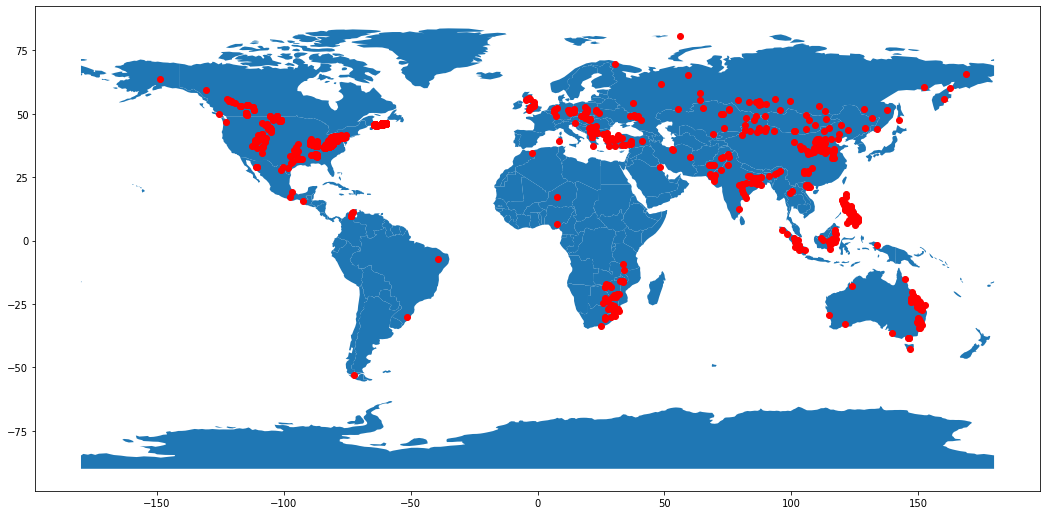

In [55]:
fig, ax = plt.subplots(1,1,figsize=(18,12))
world.plot(ax=ax)
for pt in joined_fts:
    shp = geometry.shape(pt['geometry'])
    ax.scatter(shp.x, shp.y, c='r')